

<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-479 Reconocimiento de patrones en minería de datos </h1>

<H2 align='center'> Tarea 3 - Sistemas Recomendadores </H2>
<H3 align='center'> Lucio Fondón Rebolledo - 201773610-0</H3>
<H3 align='center'> Francisco Reyes Jainaga - 201773529-5</H3>
<hr style="height:2px;border:none"/>

# Instrucciones

1. La tarea debe ser desarrollada en parejas.  
2. Los medios de consultas serán Aula y el canal de Discord oficial del curso. 
3. La tarea debe ser realizada en Jupyter Notebook (Python3) utilizando este archivo como base. 
4. Se evaluará la correcta implementación de los algoritmos de filtrado colaborativo aplicados a los datasets escogido por cada grupo, como también la comprensión de los fundamentos teóricos, ventajas y desventajas de cada técnica. 
5. El archivo de entrega debe denominarse T3_Apellido1_Apellido2.ipynb. De no respetarse este formato existirá un descuento de 30 puntos. 
6. La fecha de entrega es el lunes 2 de agosto a las 23:55 hrs, posterior a esto se descontará 1 punto por cada minuto de atraso.  

In [1]:
#Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors


## Datasets Tarea

Para la tarea tendrán a su disposición los siguientes 3 datasets, <b> de las cuales tendrán que escoger 2 para realizar la implementación de su tarea. </b>

   ### 1. MovieLens: 
   Es uno de los datasets más populares de recomendación y recopila las preferencias de usuarios de internet con respecto a películas que son evaluadas de 0 a 5 estrellas. Este dataset ha sido utilizado en diversos estudios de investigación en áreas como la recomendación personalizada y la psicología social.  
* <b>Archivos: </b>
    - ML_ratings.csv: contiene los ratings dados por usuarios a películas. Se compone por las columnas user_id, movie_id y rating. 
    - movies.csv: contiene la metadata sobre las películas. Incluye las columnas movie_id, title y genres (donde se encuentran los géneros de la película separados por "|"). 
 
* <b>Cantidad de ratings</b>: 100836
* <b>Cantidad de usuarios</b>: 610
* <b>Cantidad de películas</b>: 9724
* <b>Calificación</b> 0 a 5 (valores enteros) 

Referencias: [Movielens Dataset](https://grouplens.org/datasets/movielens/) 
   

In [2]:
df_ML_ratings = pd.read_csv("ML_ratings.csv")
df_movies = pd.read_csv("movies.csv")

display(df_ML_ratings)
display(df_movies)

,user_id,movie_id,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### 2. Book-Crossing: 
Es un datasets de ratings de libros recolectado por Cai-Nicolas Ziegler desde la <i>Book-Crossing community</i>. El dataset original contiene 1,149,780 ratings generados por 278,858 usuarios a 271,379 libros. 

* <b>Archivos</b>: 
    - BX_ratings.csv: contiene los ratings dados por usuarios a diferentes libros. Se compone de las columnas user_id, ISBN (identificador para los libros) y rating.
    - books.csv: contiene los títulos de libros asociados a los códigos ISBN (utilizados como item_id). Se compone de las columnas ISBN y title. 

* <b>Cantidad de ratings</b>: 359263
* <b>Cantidad de usuarios</b>: 10775
* <b>Cantidad de libros</b>: 10773
* <b>Calificación</b>: 0 a 10 (valores enteros)

Referencias: [Book-Crossing Dataset](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)

In [3]:
df_BX_ratings = pd.read_csv("BX_ratings.csv")
df_books = pd.read_csv("books.csv")

display(df_BX_ratings)
display(df_books)

,user_id,ISBN,rating
0,276762,034544003X,0
1,276762,0380711524,5
2,276762,0451167317,0
3,276762,3404611306,0
4,276798,3442437407,0
...,...,...,...
359258,276704,0441007813,0
359259,276704,0446353957,0
359260,276704,0446605409,0
359261,276704,0743211383,7


,ISBN,title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi
...,...,...
271355,0440400988,There's a Bat in Bunk Five
271356,0525447644,From One to One Hundred
271357,006008667X,Lily Dale : The True Story of the Town that Ta...
271358,0192126040,Republic (World's Classics)


### 3. Jester:     
Es un dataset desarrollado por Ken Goldberg y su equipo en la Universidad de Berkeley, el cual contiene alrededor de 6 millones de ratings con respecto a 150 chistes cortos. 
* <b>Archivos</b>:
    - JT_ratings.csv: contiene los ratings dados por usuarios a diferentes chistes cortos. Se compone por las columnas joke_id, user_id y rating. 
    - jokes.csv: contiene 

* <b>Cantidad de ratings</b>: 199900
* <b>Cantidad de usuarios</b>: 1999
* <b>Cantidad de chistes</b>: 100 
* <b>Calificación</b>: -10 a 10 (valores reales)
    
Referencias: [Jester Dataset](http://eigentaste.berkeley.edu/dataset/)

In [4]:
df_JT_ratings = pd.read_csv("JT_ratings.csv")
df_jokes = pd.read_csv("jokes.csv")

display(df_JT_ratings)
display(df_jokes)

,joke_id,user_id,rating
0,0,1,5.10
1,1,1,4.90
2,2,1,1.75
3,3,1,-4.17
4,4,1,5.15
...,...,...,...
199895,95,1999,-4.13
199896,96,1999,-1.21
199897,97,1999,5.29
199898,98,1999,-9.13


,joke_id,joke_text
0,0,"A man visits the doctor. The doctor says ""I ha..."
1,1,This couple had an excellent relationship goin...
2,2,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,3,Q. What's the difference between a man and a t...
4,4,Q.\tWhat's O. J. Simpson's Internet address? \...
...,...,...
95,95,Two attorneys went into a diner and ordered tw...
96,96,A teacher is explaining to her class how diffe...
97,97,Age and Womanhood\n\n1. Between the ages of 13...
98,98,A bus station is where a bus stops.\nA train s...


## Instrucciones

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs11227-020-03266-2/MediaObjects/11227_2020_3266_Fig1_HTML.png" title="Title text" width="60%" />
<center> <i> Figura 1. Collaborative Filtering. </i> </center>

## 1. User based Collaborative Filtering (40 puntos) 

La primera parte de la tarea constará de las siguientes secciones: 
1. Implementación de un sistema de recomendación de filtro colaborativo basado en usuarios utilizando los k vecinos más cercanos. Para esta parte, se debe utilizar <b> similaridad coseno </b> como medida de similaridad entre el usuario objetivo y el resto de usuarios. Además, el parámetro k debe ser escogido por ustedes. 

2. Se ingresa nuevo usuario al sistema, se le pide que califique 10 productos (a elección) y a partir de eso se le realiza la recomendación de 5 productos que no ha calificado. Es importante que en su procedimiento se muestren las ids de los k vecinos más cercanos.  

3. Concluir y responder las siguientes preguntas: 

   >a. ¿Cuáles fueron las 5 recomendaciones obtenidas? Analice y concluya respecto a estos resultados.  
    
   >b. ¿Qué cantidad de vecinos cercanos (k) se escogió para la recomendación? ¿En qué influye la elección de este parámetro? ¿Qué sucede a medida que aumenta este parámetro?
    
   >c. ¿Cuál era el porcentaje de <i>sparsity</i> de la matriz usuarios-items? ¿Cuáles son las desventajas de este enfoque? 


<i>Importante: Esto debe ser realizado para ambos datasets escogidos</i>


### MovieLens

user_id
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

<AxesSubplot:>

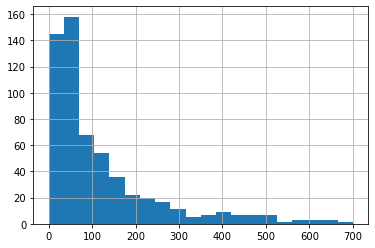

In [5]:
# distribution of ratings per user
# (we may want to exclude users without many data points)
ratings_per_user = df_ML_ratings.groupby('user_id')['rating'].count()
display(ratings_per_user)
ratings_per_user.hist(bins=20, range=(0,700))

movie_id
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

<AxesSubplot:>

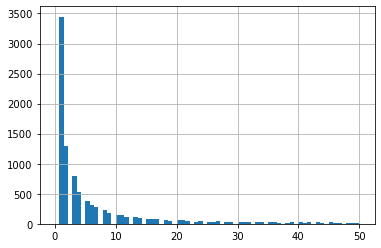

In [6]:
ratings_per_movie = df_ML_ratings.groupby('movie_id')['rating'].count()
display(ratings_per_movie)
ratings_per_movie.hist(bins=70, range=(0,50))

Primero, debemos generar la matriz de ratings entre los usuarios y las películas rateadas, de tal forma que quede una matriz cuadrada $n x n$, en donde $n$ serían la cantidad de usuarios en el dataset, y los valores de la matriz será el rating del usuario $i$ con la película $j$

In [7]:
rating_matrix = df_ML_ratings.pivot_table(index = 'user_id',columns = 'movie_id', values = 'rating').fillna(0)

display(rating_matrix)


movie_id,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora, como estamos realizando User based Collaborative Filtering, queremos encontrar los $k$ usuarios más parecidos a algún usuario objetivo, entonces, crearemos una función para poder realizar esto

In [8]:
# Creamos una función que nos retorne los usuarios más similares a un usuario objetivo
# Se utilizará (como es pedido) la similaridad coseno como métrica
import operator

def similar_users(user_id, matrix, k):
    # create a df of just the current user
    user = matrix[matrix.index == user_id]
    
    # and a df of all other users
    other_users = matrix[matrix.index != user_id]
    
    # calc cosine similarity between user and each other user
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # create list of indices of these users
    indices = other_users.index.tolist()
    
    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(indices, similarities))
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()
    
    # grab k users off the top
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users

current_user = 603
# try it out
similar_user_indices = similar_users(current_user, rating_matrix,3)
print(similar_user_indices)
#=> [30773, 39021, 45603]

[597, 469, 275]


## 2. Item based Collaborative Filtering (40 puntos) 

La segunda parte de la tarea constará de las siguientes secciones: 
1. Implementación de un sistema de recomendación de filtro colaborativo basado en ítems utilizando los k ítems más cercanos. Para esta parte, se debe utilizar <b> similaridad coseno </b> como medida de similaridad entre los ítems. Además, el parámetro k debe ser escogido por ustedes. 

2. Se ingresa nuevo usuario al sistema, se le pide que califique 10 productos (a elección) y a partir de eso se le realiza la recomendación de 5 productos que no ha calificado. Para poder llevar a cabo la recomendación recordar los siguientes pasos:
    >a. Se debe generar la matriz de similaridad entre productos basada en la similaridad coseno.
    
    >b. Para realizar la recomendación, se debe predecir el rating de todos los productos que el usuario nuevo del sistema no haya calificado aún. Para esto, se deben obtener los k ítems más cercanos al ítem a predecir y se debe predecir su rating en base a la <i> weighted sum </i> de los ratings de dichos k ítems. 
    
    >c. Una vez predecidos los ratings para todos los productos sin calificación, se deben recomendar al usuario los 5 productos con mayor rating predecido. 

3. Concluir y responder las siguientes preguntas: 

   >a. ¿Cuáles fueron las 5 recomendaciones obtenidas? Analice y concluya respecto a estos resultados.  
    
   >b. ¿Qué cantidad de vecinos cercanos (k) se escogió para la recomendación? ¿En qué influye la elección de este parámetro? ¿Qué sucede a medida que aumento este parámetro?
    
   >c. ¿Cuáles son las ventajas de este enfoque respecto al anterior? 


<i>Importante: Esto debe ser realizado para ambos datasets escogidos</i>

###  Book-Crossing

ISBN
0002259001       10
0002558122        7
0006172768       10
0006374921       10
0006475973       14
                 ..
9724113361        8
9726106141       12
9726116902       11
9727722458       11
9770390107900     8
Name: rating, Length: 10773, dtype: int64

<AxesSubplot:>

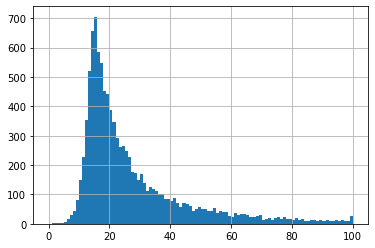

In [9]:
# distribution of ratings per item
# (we may want to exclude items without many data points)
ratings_per_items = df_BX_ratings.groupby('ISBN')['rating'].count()
display(ratings_per_items)
ratings_per_items.hist(bins=100, range=(0,100))

user_id
8           1
99          6
242         5
243        69
254       145
         ... 
278633     47
278637      2
278771      9
278843     28
278851      7
Name: rating, Length: 10775, dtype: int64

<AxesSubplot:>

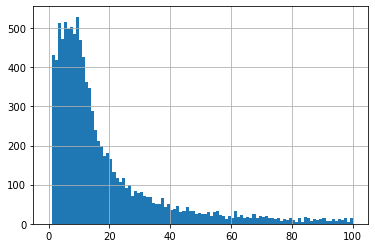

In [10]:
ratings_per_user = df_BX_ratings.groupby('user_id')['rating'].count()
display(ratings_per_user)
ratings_per_user.hist(bins=100, range=(0,100))

In [11]:
rating_matrix = df_BX_ratings.pivot_table(index = 'ISBN',columns = 'user_id', values = 'rating').fillna(0)

display(rating_matrix)


user_id,8,99,242,243,254,383,388,408,424,446,...,278522,278535,278554,278563,278582,278633,278637,278771,278843,278851
ISBN,,,,,,,,,,,,,,,,,,,,,
0002259001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002558122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006172768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006374921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006475973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9724113361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9726106141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9726116902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#para verificar que la matriz tiene valores no nulos en algún user
print((not 0 in rating_matrix[276762]))

True


In [ ]:
number_neighbors = 3
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(rating_matrix.values)
distances, indices = knn.kneighbors(rating_matrix.values, n_neighbors=number_neighbors)

In [ ]:
print(indices)
print(rating_matrix)

In [ ]:
#recomendador de libros pero sin ingresar valores de usuario, falta ese paso
copia_aux = rating_matrix.copy()

#para el ejemplo se uso user 8
user = 8

user_index = rating_matrix.columns.tolist().index(user)

#empieza la busqueda de sugerencias
for m,t in list(enumerate(rating_matrix.index)):
  
      # se encuentran libros sin calificar de usuario
      if rating_matrix.iloc[m, user_index] == 0:
        similar_books = indices[m].tolist()
        books_distances = distances[m].tolist()

        #se saca el libro de las similitudes. 
        if m in similar_books:
            book_id = similar_books.index(m)
            similar_books.remove(m)
            books_distances.pop(book_id) 

        # si existen muchos ceros a vecinos cercanos se sacan los vecinos mas lejanos.
        else:
            similar_books = similar_books[:number_neighbors-1]
            books_distances = books_distances[:number_neighbors-1]


        book_similarity = [1-x for x in books_distances]
        book_similarity_copy = book_similarity.copy()
        nominator = 0

        # para cada libro similar
        for s in range(0, len(book_similarity)):

          # vemos si valor es cero
            if rating_matrix.iloc[similar_books[s], user_index] == 0:

            # de ser cero se ignora
                if len(book_similarity_copy) == (number_neighbors - 1):
                    book_similarity_copy.pop(s)

                else:
                    book_similarity_copy.pop(s-(len(book_similarity)-len(book_similarity_copy)))


            else:
                nominator = nominator + book_similarity[s]*rating_matrix.iloc[similar_books[s],user_index]
        if len(book_similarity_copy) > 0:
            if sum(book_similarity_copy) > 0:
                predicted_r = nominator/sum(book_similarity_copy)
            else:
                predicted_r = 0
        else:
            predicted_r = 0
        copia_aux.iloc[m,user_index] = predicted_r
        
        #la copia del la matriz, copia_aux, actualiza todas las predicciones para el usuario user

In [ ]:
def books_recom(user, num_recommended_books):

    recommended_books = []

    for m in rating_matrix[rating_matrix[user] == 0].index.tolist():

        index_rating = rating_matrix.index.tolist().index(m)
        predicted_rating = copia_aux.iloc[index_rating, copia_aux.columns.tolist().index(user)]
        recommended_books.append((m, predicted_rating))

    sorted_rm = sorted(recommended_books, key=lambda x:x[1], reverse=True)
  
    print('Libros recomendados para ti\n')
    rank = 1
    for recommended_books in sorted_rm[:num_recommended_books]:
    
        print('{}: {} - predicción:{}'.format(rank, recommended_books[0], recommended_books[1]))
        rank = rank + 1

In [ ]:
books_recom(8, 3)

In [ ]:
display(df_books.values[0][0])

In [ ]:
#hacer df_books a diccionario, ibsn key, title value
names_dic = {}
for i in df_books.values:
    names_dic[str(i[0])] = i[1]
    
print(names_dic.get("0002259001"))

display(df_books)

## 3. Conclusiones finales (20 puntos)

1. Analice los resultados obtenidos y contraste ambos enfoques (ubcf y ibcf). 
2. Analice ventajas y desventajas de ambos enfoques. 

### Recomendación K-neighbours 

Para calcular la búsqueda de los k vecinos más cercanos en su implementación, pueden hacer uso de la función de sklearn que se encuentra importada en el Notebook. Sin embargo, se sugiere que utilicen la librería [MRPT](https://github.com/vioshyvo/mrpt) debido a que se posiciona como una de las librerías más rápidas para la búsqueda de vecinos cercanos. 